In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [3]:
dt_1 = pd.read_csv("dt_1.csv", header=None)
dt_1.columns = ["age", "gender"]

dt_2 = pd.read_csv("dt_2.csv", header=None)
dt_2.columns = ["age", "gender"]

In [4]:
dt_1_transaction = pd.read_csv("J:\\NCBiR_1\\video_gender_age_detection_algorithm\\2020_10_23_7-8.csv")
#dt_1_transaction.columns = ["age", "gender"]

dt_2_transaction = pd.read_csv("J:\\NCBiR_1\\video_gender_age_detection_algorithm\\2020_10_27_7-8.csv")
#dt_2_transaction.columns = ["age", "gender"]

In [5]:
# grouping by the FPS rate -- 5 fps
dt_1_transaction[["age", "gender"]]= dt_1_transaction['TimeStampSeconds'].apply(lambda x: dt_1.iloc[x*5])
dt_2_transaction[["age", "gender"]]= dt_2_transaction['TimeStampSeconds'].apply(lambda x: dt_2.iloc[x*5])

In [6]:
new_dt_1 = pd.DataFrame([])
for t in dt_1_transaction.TimeStampSeconds.unique():
    
    curr_transaction = dt_1_transaction[dt_1_transaction.TimeStampSeconds==t]
    
    order = ", ".join(curr_transaction.DisplayAs.to_list())
    price = curr_transaction.Price.sum()
    
    curr_transaction = curr_transaction.drop(["DisplayAs", "Receipt", "ProductID", "Price"], axis=1).drop_duplicates()
    curr_transaction['order'] = order
    curr_transaction['Total_price'] = price
    
    new_dt_1 = pd.concat([new_dt_1, curr_transaction], axis=0)


In [7]:
new_dt_2 = pd.DataFrame([])
for t in dt_2_transaction.TimeStampSeconds.unique():
    
    curr_transaction = dt_2_transaction[dt_2_transaction.TimeStampSeconds==t]
    
    order = ", ".join(curr_transaction.DisplayAs.to_list())
    price = curr_transaction.Price.sum()
    curr_transaction = curr_transaction.drop(["DisplayAs", "Receipt", "ProductID", "Price"], axis=1).drop_duplicates()
    curr_transaction['order'] = order
    curr_transaction['Total_price'] = price
    
    new_dt_2 = pd.concat([new_dt_2, curr_transaction], axis=0)


Text(0.5, 1.0, 'Age pie chart for the 1st film')

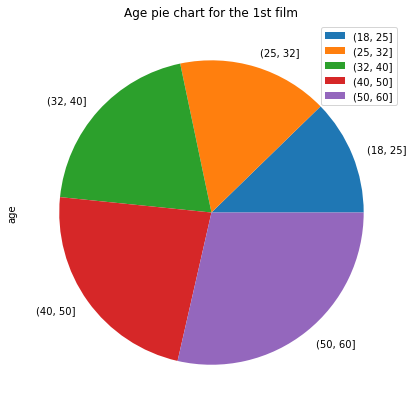

In [8]:
mean_by_age_group_df = new_dt_1.groupby(pd.cut(new_dt_1.age,[18,25,32,40,50,60]))\
.agg({'age':'mean'})
mean_by_age_group_df.plot.pie(y='age', figsize=(7,7)).set_title("Age pie chart for the 1st film")

Text(0.5, 1.0, 'Age pie chart for the 2nd film')

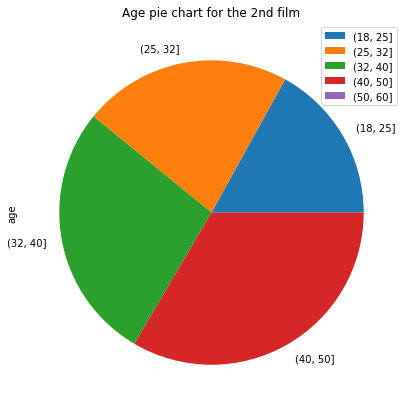

In [9]:
mean_by_age_group_df = new_dt_2.groupby(pd.cut(new_dt_2.age,[18,25,32,40,50,60]))\
.agg({'age':'mean'})
mean_by_age_group_df.plot.pie(y='age', figsize=(7,7)).set_title("Age pie chart for the 2nd film")

Text(0.5, 1.0, 'Age pie chart for the 1st film')

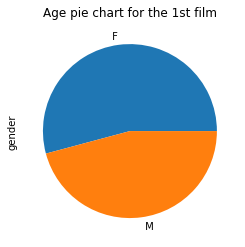

In [10]:
new_dt_1.gender.value_counts().plot(kind='pie', y='gender').set_title("Age pie chart for the 1st film")


Text(0.5, 1.0, 'Age pie chart for the 2nd film')

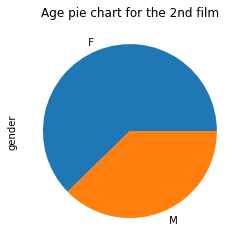

In [11]:
new_dt_2.gender.value_counts().plot.pie(y='gender').set_title("Age pie chart for the 2nd film")


In [12]:
new_dt_1["age_bracket"] = pd.cut(new_dt_1.age,[18,25,32,40,50,60]).astype(str)#.str.strip('()[]')
new_dt_2["age_bracket"] = pd.cut(new_dt_2.age,[18,25,32,40,50]).astype(str).dropna()#.str.strip('()[]')

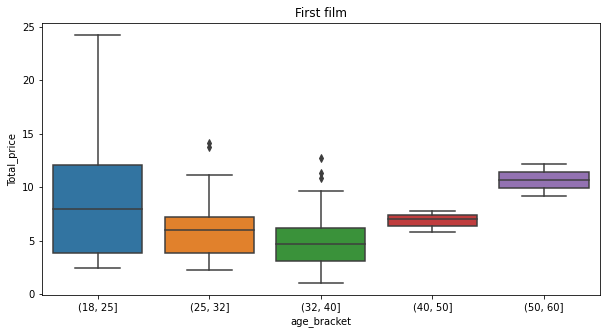

In [13]:
plt.figure(figsize=(10,5))
plt.title("First film")
ax = sns.boxplot(x=new_dt_1['age_bracket'], y=new_dt_1['Total_price'], order=sorted(new_dt_1['age_bracket'].unique()))

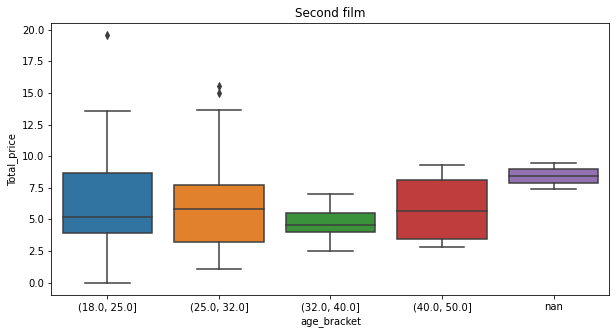

In [14]:
plt.figure(figsize=(10,5))
plt.title("Second film")
ax1 = sns.boxplot(x=new_dt_2['age_bracket'], y=new_dt_2['Total_price'], order=sorted(new_dt_2['age_bracket'].unique()))